# EDA



In [ ]:
# For google colab 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# For google colab 
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/loan_prediction')

In [ ]:
%load_ext google.colab.data_table

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from loan_prediction.config import split_train, prep_train
from loan_prediction.custom_funcs import *

In [ ]:
df = pd.read_csv(split_train)
df = drop_col(df, 'LoanNr_ChkDgt')
label = 'MIS_Status'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,717733.000000,717733.000000,717733.000000,717733.000000,717633.000000,717733.00000,717733.000000,717733.000000,717733.000000
mean,53843.424372,398731.357524,110.815890,11.395040,1.280255,8.40327,10.780751,2756.751296,0.756929
std,31170.958176,263247.877447,78.897445,73.554447,0.451716,236.30060,236.906138,12765.072159,0.646117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27609.000000,235210.000000,60.000000,2.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,55413.000000,445310.000000,84.000000,4.000000,1.000000,0.00000,1.000000,1.000000,1.000000
75%,83705.000000,561730.000000,120.000000,10.000000,2.000000,1.00000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.00000,9500.000000,99999.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717733 entries, 0 to 717732
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               717723 non-null  object 
 1   City               717708 non-null  object 
 2   State              717721 non-null  object 
 3   Zip                717733 non-null  int64  
 4   Bank               716506 non-null  object 
 5   BankState          716499 non-null  object 
 6   NAICS              717733 non-null  int64  
 7   ApprovalDate       717733 non-null  object 
 8   ApprovalFY         717733 non-null  object 
 9   Term               717733 non-null  int64  
 10  NoEmp              717733 non-null  int64  
 11  NewExist           717633 non-null  float64
 12  CreateJob          717733 non-null  int64  
 13  RetainedJob        717733 non-null  int64  
 14  FranchiseCode      717733 non-null  int64  
 15  UrbanRural         717733 non-null  int64  
 16  Re

In [ ]:
df.isnull().sum()

Name                     10
City                     25
State                    12
Zip                       0
Bank                   1227
BankState              1234
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                100
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              3613
LowDoc                 2064
ChgOffDate           587840
DisbursementDate       1751
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# preprocessing
df = drop_na(df)

In [ ]:
df.isnull().sum()


Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           580324
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

## Name

In [ ]:
df['Name'].isnull().sum()


0

In [ ]:
df['Name']

0                KUT-N-KLIP LAWN SERVICE
1         AMERICANA VINEYARDS/WINERY,INC
2            WILD WOOD CHAINSAW CARVINGS
3                    SQUEAKY DOOR MARKET
5         RAMZI AFIF KHOURY DBA DOLLAR Z
                       ...              
717728        THE CORNER ANIMAL HOSPITAL
717729                     USAccessories
717730                ZADEDA FARMS, INC.
717731                  DR. ROB'S GARAGE
717732     SANG YUL LEE DBA MEN IN BLACK
Name: Name, Length: 708966, dtype: object

In [ ]:
test = df['Name'].apply(lambda x: str(x)[-4:])
test.value_counts()[:10]


 INC    84375
INC.    82305
 LLC    55047
Inc.    27429
TION    10792
 Inc     7779
PANY     6755
NTER     5580
VICE     4653
CORP     4360
Name: Name, dtype: int64

In [ ]:
most_used_ends = ['INC', 'INC.', 'LLC', 'Inc.', 'TION', 'Inc', 'PANY']
for end in most_used_ends:
    end_filt = df['Name'].str.endswith(end, na=False)
    print(end)
    print(df[end_filt][label].value_counts(normalize=True))



INC
P I F     0.842281
CHGOFF    0.157719
Name: MIS_Status, dtype: float64
INC.
P I F     0.881733
CHGOFF    0.118267
Name: MIS_Status, dtype: float64
LLC
P I F     0.77819
CHGOFF    0.22181
Name: MIS_Status, dtype: float64
Inc.
P I F     0.684531
CHGOFF    0.315469
Name: MIS_Status, dtype: float64
TION
P I F     0.850259
CHGOFF    0.149741
Name: MIS_Status, dtype: float64
Inc
P I F     0.705686
CHGOFF    0.294314
Name: MIS_Status, dtype: float64
PANY
P I F     0.878905
CHGOFF    0.121095
Name: MIS_Status, dtype: float64


In [ ]:
df = get_endings(df)
df[df['name_end'] == 'Other'][label].value_counts(normalize=True)


P I F     0.824697
CHGOFF    0.175303
Name: MIS_Status, dtype: float64

In [ ]:
df['name_end'].value_counts()


Other    430876
INC       86375
INC.      82305
LLC       56643
Inc.      27429
TION      10792
Inc        7791
PANY       6755
Name: name_end, dtype: int64

## City

In [ ]:
df['City'].isnull().sum()

0

In [ ]:
df[df['City'].isnull()]

,name_end,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [ ]:
df['City'].nunique()

29575

In [ ]:
city_val_counts = df['City'].value_counts()[:10]
city_val_counts

LOS ANGELES    9188
HOUSTON        8114
NEW YORK       6264
CHICAGO        4802
MIAMI          4444
SAN DIEGO      4232
DALLAS         3992
PHOENIX        3546
LAS VEGAS      3474
BROOKLYN       2970
Name: City, dtype: int64

In [ ]:
top_cities = city_val_counts.index
for city in top_cities:
    print(f'Current city: {city}')
    print(df[df['City'] == city][label].value_counts(normalize=True))

Current city: LOS ANGELES
P I F     0.722573
CHGOFF    0.277427
Name: MIS_Status, dtype: float64
Current city: HOUSTON
P I F     0.785556
CHGOFF    0.214444
Name: MIS_Status, dtype: float64
Current city: NEW YORK
P I F     0.777778
CHGOFF    0.222222
Name: MIS_Status, dtype: float64
Current city: CHICAGO
P I F     0.724698
CHGOFF    0.275302
Name: MIS_Status, dtype: float64
Current city: MIAMI
P I F     0.671242
CHGOFF    0.328758
Name: MIS_Status, dtype: float64
Current city: SAN DIEGO
P I F     0.849716
CHGOFF    0.150284
Name: MIS_Status, dtype: float64
Current city: DALLAS
P I F     0.802104
CHGOFF    0.197896
Name: MIS_Status, dtype: float64
Current city: PHOENIX
P I F     0.812183
CHGOFF    0.187817
Name: MIS_Status, dtype: float64
Current city: LAS VEGAS
P I F     0.748129
CHGOFF    0.251871
Name: MIS_Status, dtype: float64
Current city: BROOKLYN
P I F     0.664983
CHGOFF    0.335017
Name: MIS_Status, dtype: float64


In [ ]:
# preprocessing
df = drop_col(df, 'City')


## Zip

In [ ]:
basic_cat_col_data(df, 'Zip', label, 5)

Dtype: int64
Null values: 0
Unique: 31654
Vals: 
 10001    749
90015    732
93401    611
90010    583
33166    525
Name: Zip, dtype: int64
Current category: 10001
P I F     0.738318
CHGOFF    0.261682
Name: MIS_Status, dtype: float64
Current category: 90015
P I F     0.692623
CHGOFF    0.307377
Name: MIS_Status, dtype: float64
Current category: 93401
P I F     0.903437
CHGOFF    0.096563
Name: MIS_Status, dtype: float64
Current category: 90010
CHGOFF    0.540309
P I F     0.459691
Name: MIS_Status, dtype: float64
Current category: 33166
P I F     0.695238
CHGOFF    0.304762
Name: MIS_Status, dtype: float64


In [ ]:
df = drop_col(df, 'Zip')

In [ ]:
df

,name_end,State,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,Other,FL,BANK OF AMERICA NATL ASSOC,NC,561730,22-Nov-02,2003,84,1,1.0,0,1,1,1,Y,N,NaN,31-Jan-03,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
1,INC,NY,ALTERNATIVES FCU,NY,312130,18-Jul-00,2000,12,9,1.0,0,0,1,2,N,N,NaN,30-Sep-00,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$45,000.00"
2,Other,IA,BBCN BANK,CA,453998,13-Sep-05,2005,48,1,1.0,0,1,1,1,0,N,3-Nov-08,30-Sep-05,"$10,000.00",$0.00,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
3,Other,SD,WELLS FARGO BANK NATL ASSOC,SD,445110,2-Jun-99,1999,60,9,1.0,0,0,1,0,0,Y,NaN,30-Sep-99,"$26,000.00",$0.00,P I F,$0.00,"$26,000.00","$20,800.00"
5,Other,CA,CAPITAL ONE NATL ASSOC,VA,452990,17-Jul-07,2007,66,3,1.0,1,3,0,1,N,N,10-Jul-10,31-Aug-07,"$100,000.00",$0.00,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,UNITY BANK,NJ,541940,27-Sep-99,1999,228,2,2.0,4,2,1,1,0,N,NaN,30-Apr-00,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$375,000.00"
717729,Other,CA,BANK OF AMERICA NATL ASSOC,NC,422320,13-Oct-05,2006,57,1,2.0,0,1,0,1,T,N,14-Aug-08,31-Mar-06,"$45,450.00",$0.00,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
717730,INC.,NH,GRANITE ST. ECONOMIC DEVEL COR,NH,0,10-Jun-97,1997,240,8,2.0,8,0,1,0,N,N,NaN,11-Mar-98,"$291,000.00",$0.00,P I F,$0.00,"$291,000.00","$291,000.00"
717731,Other,ME,NORTHEAST BANK,ME,811111,7-Oct-96,1997,120,1,1.0,0,0,1,0,N,Y,NaN,31-Dec-96,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


## Bank

In [ ]:
basic_cat_col_data(df, 'Bank', label, 10)


Dtype: object
Null values: 0
Unique: 5579
Vals: 
 BANK OF AMERICA NATL ASSOC        69043
WELLS FARGO BANK NATL ASSOC       50210
JPMORGAN CHASE BANK NATL ASSOC    37954
U.S. BANK NATIONAL ASSOCIATION    27853
CITIZENS BANK NATL ASSOC          26727
PNC BANK, NATIONAL ASSOCIATION    21774
BBCN BANK                         18238
CAPITAL ONE NATL ASSOC            17766
MANUFACTURERS & TRADERS TR CO      8912
READYCAP LENDING, LLC              8459
Name: Bank, dtype: int64
Current category: BANK OF AMERICA NATL ASSOC
P I F     0.723245
CHGOFF    0.276755
Name: MIS_Status, dtype: float64
Current category: WELLS FARGO BANK NATL ASSOC
P I F     0.858096
CHGOFF    0.141904
Name: MIS_Status, dtype: float64
Current category: JPMORGAN CHASE BANK NATL ASSOC
P I F     0.721242
CHGOFF    0.278758
Name: MIS_Status, dtype: float64
Current category: U.S. BANK NATIONAL ASSOCIATION
P I F     0.826949
CHGOFF    0.173051
Name: MIS_Status, dtype: float64
Current category: CITIZENS BANK NATL ASSOC
P I F    

In [ ]:
df['Bank'].value_counts()[:10].sum()

286936

In [ ]:
df = drop_col(df, 'Bank')

## BankState


In [ ]:
basic_cat_col_data(df, 'BankState', label, 56)

Dtype: object
Null values: 0
Unique: 56
Vals: 
 CA    93247
NC    63161
IL    51949
OH    46278
SD    40366
TX    37761
RI    35066
NY    31405
VA    23041
DE    19555
MN    15883
UT    14992
PA    13525
WI    12257
MO    11730
GA    10918
FL    10884
MA    10883
AL     9620
OR     8941
WA     8431
CO     8364
CT     7817
IA     7811
NJ     7525
KS     7010
MT     6173
IN     6024
SC     5927
MI     5821
OK     5732
MD     5550
NH     5339
AR     4990
MS     4675
TN     4451
NE     4201
ND     4055
LA     3985
VT     3753
NM     3460
NV     3447
KY     3443
ID     3426
DC     3149
AZ     3141
ME     2928
HI     2320
WY     1709
WV     1577
AK     1133
PR      129
GU        5
VI        1
AN        1
EN        1
Name: BankState, dtype: int64
Current category: CA
P I F     0.781687
CHGOFF    0.218313
Name: MIS_Status, dtype: float64
Current category: NC
P I F     0.705229
CHGOFF    0.294771
Name: MIS_Status, dtype: float64
Current category: IL
P I F     0.774702
CHGOFF    0.225298
Name: M

In [ ]:
# df = replace_small_states(df)
#
# basic_cat_col_data(df, 'BankState', label, 56)

In [ ]:
df[df['State'] == df['BankState']][label].value_counts(normalize=True)

P I F     0.894745
CHGOFF    0.105255
Name: MIS_Status, dtype: float64

In [ ]:
df[df['State'] != df['BankState']][label].value_counts(normalize=True)


P I F     0.744667
CHGOFF    0.255333
Name: MIS_Status, dtype: float64

In [ ]:
df = tranform_bank_state(df)

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,Other,FL,False,561730,22-Nov-02,2003,84,1,1.0,0,1,1,1,Y,N,NaN,31-Jan-03,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
1,INC,NY,True,312130,18-Jul-00,2000,12,9,1.0,0,0,1,2,N,N,NaN,30-Sep-00,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$45,000.00"
2,Other,IA,False,453998,13-Sep-05,2005,48,1,1.0,0,1,1,1,0,N,3-Nov-08,30-Sep-05,"$10,000.00",$0.00,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
3,Other,SD,True,445110,2-Jun-99,1999,60,9,1.0,0,0,1,0,0,Y,NaN,30-Sep-99,"$26,000.00",$0.00,P I F,$0.00,"$26,000.00","$20,800.00"
5,Other,CA,False,452990,17-Jul-07,2007,66,3,1.0,1,3,0,1,N,N,10-Jul-10,31-Aug-07,"$100,000.00",$0.00,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,541940,27-Sep-99,1999,228,2,2.0,4,2,1,1,0,N,NaN,30-Apr-00,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$375,000.00"
717729,Other,CA,False,422320,13-Oct-05,2006,57,1,2.0,0,1,0,1,T,N,14-Aug-08,31-Mar-06,"$45,450.00",$0.00,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
717730,INC.,NH,True,0,10-Jun-97,1997,240,8,2.0,8,0,1,0,N,N,NaN,11-Mar-98,"$291,000.00",$0.00,P I F,$0.00,"$291,000.00","$291,000.00"
717731,Other,ME,True,811111,7-Oct-96,1997,120,1,1.0,0,0,1,0,N,Y,NaN,31-Dec-96,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


## State

In [ ]:
basic_cat_col_data(df, 'State', label, show_vals=51)

Dtype: object
Null values: 0
Unique: 51
Vals: 
 CA    103482
TX     55378
NY     45599
FL     32489
PA     27557
OH     25748
IL     23318
MA     19800
MN     19346
NJ     19072
WA     18346
GA     17555
WI     16664
MO     16293
CO     16257
MI     16231
UT     14835
AZ     13932
NC     11174
IN     11079
MD     10474
VA     10380
CT      9538
NH      9461
IA      9455
KS      9085
OR      8801
OK      7789
LA      7546
TN      7471
ID      7413
RI      7105
MT      6864
AL      6571
NV      6328
KY      6128
MS      6040
NE      5027
AR      5026
NM      4758
ME      4734
SC      4425
VT      4279
ND      4176
SD      3451
HI      2806
WV      2569
WY      2219
AK      1891
DE      1720
DC      1281
Name: State, dtype: int64
Current category: CA
P I F     0.814567
CHGOFF    0.185433
Name: MIS_Status, dtype: float64
Current category: TX
P I F     0.811297
CHGOFF    0.188703
Name: MIS_Status, dtype: float64
Current category: NY
P I F     0.798175
CHGOFF    0.201825
Name: MIS_Status, dt

In [ ]:
# df = states_to_rate_categories(df, label)


In [ ]:
# df[df['State'] == 'u_11'][label].value_counts(normalize=True)

In [ ]:
val_counts = df['State'].value_counts()
val_counts

CA    103482
TX     55378
NY     45599
FL     32489
PA     27557
OH     25748
IL     23318
MA     19800
MN     19346
NJ     19072
WA     18346
GA     17555
WI     16664
MO     16293
CO     16257
MI     16231
UT     14835
AZ     13932
NC     11174
IN     11079
MD     10474
VA     10380
CT      9538
NH      9461
IA      9455
KS      9085
OR      8801
OK      7789
LA      7546
TN      7471
ID      7413
RI      7105
MT      6864
AL      6571
NV      6328
KY      6128
MS      6040
NE      5027
AR      5026
NM      4758
ME      4734
SC      4425
VT      4279
ND      4176
SD      3451
HI      2806
WV      2569
WY      2219
AK      1891
DE      1720
DC      1281
Name: State, dtype: int64

## NAICS

In [ ]:
basic_cat_col_data(df, 'NAICS', label, 20)

Dtype: int64
Null values: 0
Unique: 1304
Vals: 
 0         158409
722110     22232
722211     15454
811111     11554
621210     11189
624410      8048
812112      7223
561730      7032
621310      6926
812320      6273
541110      5605
445310      5449
621111      5349
721110      5307
713940      5248
447110      5201
811121      4917
451110      4799
453220      4712
484110      4621
Name: NAICS, dtype: int64
Current category: 0
P I F     0.916886
CHGOFF    0.083114
Name: MIS_Status, dtype: float64
Current category: 722110
P I F     0.761965
CHGOFF    0.238035
Name: MIS_Status, dtype: float64
Current category: 722211
P I F     0.747509
CHGOFF    0.252491
Name: MIS_Status, dtype: float64
Current category: 811111
P I F     0.843864
CHGOFF    0.156136
Name: MIS_Status, dtype: float64
Current category: 621210
P I F     0.96005
CHGOFF    0.03995
Name: MIS_Status, dtype: float64
Current category: 624410
P I F     0.877982
CHGOFF    0.122018
Name: MIS_Status, dtype: float64
Current category

In [ ]:
df = transform_naics_col(df)

In [ ]:
basic_cat_col_data(df, 'NAICS', label, 25)

Dtype: object
Null values: 0
Unique: 20
Vals: 
 0        158409
44        67047
81        57331
54        53725
72        53635
23        52507
62        43783
42        38462
45        33607
33        30233
56        25763
48        16053
32        14041
71        11575
53        10812
31         9285
Other      9206
51         8977
52         7474
11         7041
Name: NAICS, dtype: int64
Current category: 0
P I F     0.916886
CHGOFF    0.083114
Name: MIS_Status, dtype: float64
Current category: 44
P I F     0.775426
CHGOFF    0.224574
Name: MIS_Status, dtype: float64
Current category: 81
P I F     0.802271
CHGOFF    0.197729
Name: MIS_Status, dtype: float64
Current category: 54
P I F     0.81033
CHGOFF    0.18967
Name: MIS_Status, dtype: float64
Current category: 72
P I F     0.779211
CHGOFF    0.220789
Name: MIS_Status, dtype: float64
Current category: 23
P I F     0.765307
CHGOFF    0.234693
Name: MIS_Status, dtype: float64
Current category: 62
P I F     0.89754
CHGOFF    0.10246


## ApprovalDate

In [ ]:
basic_cat_col_data(df, 'ApprovalDate', label, 10)


Dtype: object
Null values: 0
Unique: 9543
Vals: 
 7-Jul-93     910
30-Jan-04    831
8-Jul-93     623
4-Oct-04     511
30-Sep-03    501
30-Jun-05    431
6-Jul-93     427
18-Apr-05    419
21-Jan-05    385
19-Dec-03    384
Name: ApprovalDate, dtype: int64
Current category: 7-Jul-93
P I F     0.976923
CHGOFF    0.023077
Name: MIS_Status, dtype: float64
Current category: 30-Jan-04
P I F     0.807461
CHGOFF    0.192539
Name: MIS_Status, dtype: float64
Current category: 8-Jul-93
P I F     0.990369
CHGOFF    0.009631
Name: MIS_Status, dtype: float64
Current category: 4-Oct-04
P I F     0.798434
CHGOFF    0.201566
Name: MIS_Status, dtype: float64
Current category: 30-Sep-03
P I F     0.846307
CHGOFF    0.153693
Name: MIS_Status, dtype: float64
Current category: 30-Jun-05
P I F     0.698376
CHGOFF    0.301624
Name: MIS_Status, dtype: float64
Current category: 6-Jul-93
P I F     0.985948
CHGOFF    0.014052
Name: MIS_Status, dtype: float64
Current category: 18-Apr-05
P I F     0.701671
CHGOFF    0

In [ ]:
df = date_to_datetime(df, 'ApprovalDate')

In [ ]:
df[df['ApprovalDate'] > '2010']['ApprovalDate']

17       2011-12-21
19       2012-12-05
82       2011-11-03
110      2011-02-02
138      2013-02-21
            ...    
717654   2011-11-15
717671   2012-06-18
717680   2010-12-21
717684   2010-06-24
717699   2010-03-19
Name: ApprovalDate, Length: 25058, dtype: datetime64[ns]

## ApprovalFY

In [ ]:
basic_cat_col_data(df, 'ApprovalFY', label, 10)



Dtype: object
Null values: 0
Unique: 91
Vals: 
 2005    33856
2006    32956
2007    31165
2004    29847
2005    27608
2006    27492
2007    26033
2003    25289
2004    24634
2003    20937
Name: ApprovalFY, dtype: int64
Current category: 2005
P I F     0.746603
CHGOFF    0.253397
Name: MIS_Status, dtype: float64
Current category: 2006
P I F     0.647925
CHGOFF    0.352075
Name: MIS_Status, dtype: float64
Current category: 2007
P I F     0.5691
CHGOFF    0.4309
Name: MIS_Status, dtype: float64
Current category: 2004
P I F     0.819111
CHGOFF    0.180889
Name: MIS_Status, dtype: float64
Current category: 2005
P I F     0.749602
CHGOFF    0.250398
Name: MIS_Status, dtype: float64
Current category: 2006
P I F     0.649534
CHGOFF    0.350466
Name: MIS_Status, dtype: float64
Current category: 2007
P I F     0.57308
CHGOFF    0.42692
Name: MIS_Status, dtype: float64
Current category: 2003
P I F     0.851161
CHGOFF    0.148839
Name: MIS_Status, dtype: float64
Current category: 2004
P I F     0.

In [ ]:
df['ApprovalFY'].value_counts().index

Index([   2005,    2006,    2007,    2004,  '2005',  '2006',  '2007',    2003,
        '2004',  '2003',    2002,    1995,    1996,    2008,    1999,    1997,
          2001,    2000,  '2002',    1998,  '1995',  '1996',  '2008',    1994,
        '1997',  '2000',  '1999',  '2001',  '1998',  '1994',    1993,    1992,
        '1993',    2009,  '1992',    2010,    1991,  '2009',    1990,  '2010',
          1989,  '1991',  '1990',    2011,  '1989',  '2011',    2012,  '2012',
          2013,    1987,    1986,  '2013',    1984,    1985,    1988,  '1987',
        '1986',  '1984',  '1988',    1983,  '1985',  '1983',    1982,    1981,
        '1982',  '1981',    1980,  '1980',    1979,  '1979',    2014,  '2014',
          1978,  '1978',    1977,  '1977',  '1976',    1976,    1974,    1973,
        '1973',    1975,    1972,  '1974', '1976A',  '1971',  '1975',  '1972',
          1971,  '1970',    1970],
      dtype='object')

In [ ]:
df = clean_approval_fy_col(df)

/content/gdrive/MyDrive/Colab Notebooks/loan_prediction/loan_prediction/custom_funcs.py:361: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApprovalFY'] = df['ApprovalFY'].apply(clean_str).astype('int64')


In [ ]:
basic_cat_col_data(df, 'ApprovalFY', label, 10)


Dtype: int64
Null values: 0
Unique: 45
Vals: 
 2005    61464
2006    60448
2007    57198
2004    54481
2003    46226
2002    35360
1995    33409
1996    31989
2008    30834
1997    30056
Name: ApprovalFY, dtype: int64
Current category: 2005
P I F     0.74795
CHGOFF    0.25205
Name: MIS_Status, dtype: float64
Current category: 2006
P I F     0.648657
CHGOFF    0.351343
Name: MIS_Status, dtype: float64
Current category: 2007
P I F     0.570912
CHGOFF    0.429088
Name: MIS_Status, dtype: float64
Current category: 2004
P I F     0.819754
CHGOFF    0.180246
Name: MIS_Status, dtype: float64
Current category: 2003
P I F     0.853329
CHGOFF    0.146671
Name: MIS_Status, dtype: float64
Current category: 2002
P I F     0.881787
CHGOFF    0.118213
Name: MIS_Status, dtype: float64
Current category: 1995
P I F     0.971774
CHGOFF    0.028226
Name: MIS_Status, dtype: float64
Current category: 1996
P I F     0.958861
CHGOFF    0.041139
Name: MIS_Status, dtype: float64
Current category: 2008
P I F    

In [ ]:
df['ApprovalFY'].value_counts()

2005    61464
2006    60448
2007    57198
2004    54481
2003    46226
2002    35360
1995    33409
1996    31989
2008    30834
1997    30056
1999    29917
2000    29764
2001    29673
1998    28649
1994    25089
1993    18522
1992    16579
2009    14671
2010    12832
1991    12394
1990    11689
1989    10385
2011     9371
2012     4498
2013     1877
1987     1768
1986     1657
1984     1562
1985     1517
1988     1488
1983     1291
1982      550
1981      444
1980      335
1979      280
2014      219
1978      185
1977      103
1976       63
1973       34
1974       31
1975       20
1972       19
1971       13
1970        6
Name: ApprovalFY, dtype: int64

## Term

In [ ]:
basic_cat_col_data(df, 'Term', label, 40)

Dtype: int64
Null values: 0
Unique: 399
Vals: 
 84     180463
60      70935
240     67941
120     61337
300     35510
180     22179
36      15462
12      13389
48      12285
72       7463
24       5724
96       5534
90       5475
66       4131
87       3987
63       3617
83       3285
108      3140
144      2552
6        2430
59       2417
61       2409
42       2359
288      2309
54       2248
62       2243
64       2136
78       2128
58       2087
55       2001
276      1996
50       1993
82       1988
57       1979
47       1957
40       1953
49       1952
39       1950
56       1949
51       1946
Name: Term, dtype: int64
Current category: 84
P I F     0.991605
CHGOFF    0.008395
Name: MIS_Status, dtype: float64
Current category: 60
P I F     0.972891
CHGOFF    0.027109
Name: MIS_Status, dtype: float64
Current category: 240
P I F     0.997836
CHGOFF    0.002164
Name: MIS_Status, dtype: float64
Current category: 120
P I F     0.987642
CHGOFF    0.012358
Name: MIS_Status, dtype: float

In [ ]:
val_counts = df['Term'].value_counts()

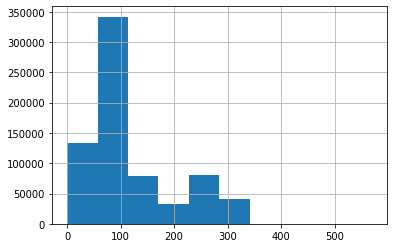

In [ ]:
df['Term'].hist()

In [ ]:
df[df['Term'] > 200][label].value_counts(normalize=True)

P I F     0.971899
CHGOFF    0.028101
Name: MIS_Status, dtype: float64

In [ ]:
df = term_transformer(df)

/content/gdrive/MyDrive/Colab Notebooks/loan_prediction/loan_prediction/custom_funcs.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Term'] = df['Term'].apply(lambda x:


In [ ]:
pd.set_option('display.max_rows', None)
df['Term'].value_counts().sort_index()

1        1263
2        1417
3        1686
4        1704
5        1485
6        2430
7        1412
8        1358
9        1494
10       1217
11       1361
12      13389
13       1622
14       1208
15       1236
16       1153
17       1175
18       1494
19       1249
20       1300
21       1260
22       1250
23       1484
24       5724
25       1452
26       1398
27       1438
28       1468
29       1386
30       1730
31       1580
32       1509
33       1542
34       1672
35       1809
36      15462
37       1793
38       1837
39       1950
40       1953
41       1859
42       2359
43       1801
44       1781
45       1775
46       1851
47       1957
48      12285
49       1952
50       1993
51       1946
52       1921
53       1906
54       2248
55       2001
56       1949
57       1979
58       2087
59       2417
60      70935
61       2409
62       2243
63       3617
64       2136
65       1940
66       4131
67       1701
68       1680
69       1703
70       1677
71       1794
72    

In [ ]:
df[df['Term'] > 300][label].value_counts(normalize=True)


P I F     0.973328
CHGOFF    0.026672
Name: MIS_Status, dtype: float64

In [ ]:
df[df['Term'] == 84][label].value_counts(normalize=True)


P I F     0.991605
CHGOFF    0.008395
Name: MIS_Status, dtype: float64

In [ ]:
df[(df['Term'] < 120) & (df['Term'] > 84)][label].value_counts(normalize=True)

P I F     0.728252
CHGOFF    0.271748
Name: MIS_Status, dtype: float64

In [ ]:
df[df['Term'] == 250].shape

(89, 23)

## NoEmp

In [ ]:
basic_cat_col_data(df, 'NoEmp')

Dtype: int64
Null values: 0
Unique: 542
Vals: 
 1     120991
2     108753
3      71485
4      57973
5      47640
6      36217
10     24840
8      24721
7      24703
12     16387
Name: NoEmp, dtype: int64
Current category: 1
P I F     0.771785
CHGOFF    0.228215
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.793771
CHGOFF    0.206229
Name: MIS_Status, dtype: float64
Current category: 3
P I F     0.794558
CHGOFF    0.205442
Name: MIS_Status, dtype: float64
Current category: 4
P I F     0.805306
CHGOFF    0.194694
Name: MIS_Status, dtype: float64
Current category: 5
P I F     0.809362
CHGOFF    0.190638
Name: MIS_Status, dtype: float64
Current category: 6
P I F     0.822017
CHGOFF    0.177983
Name: MIS_Status, dtype: float64
Current category: 10
P I F     0.852013
CHGOFF    0.147987
Name: MIS_Status, dtype: float64
Current category: 8
P I F     0.84588
CHGOFF    0.15412
Name: MIS_Status, dtype: float64
Current category: 7
P I F     0.833381
CHGOFF    0.166619
Name: MIS_S

In [ ]:
pd.set_option('display.max_rows', None)
df['NoEmp'].value_counts().sort_index()

0         5223
1       120991
2       108753
3        71485
4        57973
5        47640
6        36217
7        24703
8        24721
9        14232
10       24840
11        9337
12       16387
13        7380
14        8439
15       14438
16        6213
17        4927
18        6228
19        3011
20       11266
21        2872
22        4154
23        2773
24        2922
25        7813
26        2173
27        1936
28        2366
29        1202
30        6846
31        1147
32        1824
33        1090
34        1154
35        3956
36        1090
37         859
38        1134
39         602
40        3963
41         546
42        1015
43         697
44         537
45        2315
46         516
47         532
48         682
49         378
50        3237
51         309
52         530
53         351
54         323
55        1119
56         275
57         271
58         311
59         182
60        1937
61         169
62         335
63         237
64         196
65        1028
66        

In [ ]:
df[df['NoEmp'] == 31][label].value_counts(normalize=True)

P I F     0.920663
CHGOFF    0.079337
Name: MIS_Status, dtype: float64

In [ ]:
df[df['NoEmp'] > 100].shape[0]

5817

In [ ]:
df = transform_noemp(df)
df['NoEmp'].value_counts().sort_index()

0        5223
1      120991
2      108753
3       71485
4       57973
5       47640
6       36217
7       24703
8       24721
9       14232
10      24840
11       9337
12      16387
13       7380
14       8439
15      14438
16       6213
17       4927
18       6228
19       3011
20      11266
21       2872
22       4154
23       2773
24       2922
25       7813
26       2173
27       1936
28       2366
29       1202
30       6846
31       1147
32       1824
33       1090
34       1154
35       3956
36       1090
37        859
38       1134
39        602
40       3963
41        546
42       1015
43        697
44        537
45       2315
46        516
47        532
48        682
49        378
50       3237
51        309
52        530
53        351
54        323
55       1119
56        275
57        271
58        311
59        182
60       1937
61        169
62        335
63        237
64        196
65       1028
66        154
67        180
68        232
69        104
70       1035
71    

## NewExist

In [ ]:
basic_cat_col_data(df, 'NewExist', show_vals=2)

Dtype: float64
Null values: 0
Unique: 3
Vals: 
 1.0    508487
2.0    199006
Name: NewExist, dtype: int64
Current category: 1.0
P I F     0.828906
CHGOFF    0.171094
Name: MIS_Status, dtype: float64
Current category: 2.0
P I F     0.813086
CHGOFF    0.186914
Name: MIS_Status, dtype: float64


In [ ]:
df['NewExist'].dtype

dtype('float64')

In [ ]:
df = drop_col(df, 'NewExist')

## CreateJob

In [ ]:
basic_cat_col_data(df, 'CreateJob')

Dtype: int64
Null values: 0
Unique: 228
Vals: 
 0     495365
1      49907
2      45584
3      22774
4      16212
5      14694
10      9106
6       8623
8       5848
7       5082
Name: CreateJob, dtype: int64
Current category: 0
P I F     0.842813
CHGOFF    0.157187
Name: MIS_Status, dtype: float64
Current category: 1
P I F     0.702667
CHGOFF    0.297333
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.732538
CHGOFF    0.267462
Name: MIS_Status, dtype: float64
Current category: 3
P I F     0.767849
CHGOFF    0.232151
Name: MIS_Status, dtype: float64
Current category: 4
P I F     0.79546
CHGOFF    0.20454
Name: MIS_Status, dtype: float64
Current category: 5
P I F     0.811624
CHGOFF    0.188376
Name: MIS_Status, dtype: float64
Current category: 10
P I F     0.848122
CHGOFF    0.151878
Name: MIS_Status, dtype: float64
Current category: 6
P I F     0.84379
CHGOFF    0.15621
Name: MIS_Status, dtype: float64
Current category: 8
P I F     0.858755
CHGOFF    0.141245
Name: MIS

In [ ]:
df['CreateJob'].value_counts().sort_index()

0       495365
1        49907
2        45584
3        22774
4        16212
5        14694
6         8623
7         5082
8         5848
9         2659
10        9106
11        1619
12        3380
13        1420
14        1510
15        4275
16        1155
17         783
18        1142
19         572
20        3497
21         524
22         757
23         475
24         499
25        1840
26         288
27         259
28         363
29         285
30        1602
31         110
32         213
33         151
34         139
35         595
36         110
37         101
38         129
39          71
40         767
41          44
42          69
43          73
44          46
45         225
46          35
47          36
48          69
49          41
50         734
51          21
52          22
53          31
54          24
55         115
56          27
57          23
58          28
59          19
60         227
61          12
62          23
63          15
64          18
65          89
66        

In [ ]:
df[(df['CreateJob'] > 200) & (df['CreateJob'] < 8801)][label].value_counts(normalize=True)

P I F     0.655325
CHGOFF    0.344675
Name: MIS_Status, dtype: float64

In [ ]:
df[df['CreateJob'] > 100][label].value_counts(normalize=True)

pd.set_option('display.max_rows', 10)

In [ ]:
create_jobs_range_list = [(30, df['CreateJob'].max() + 1),
                          (20, 30),
                          (15, 20)]
df = group_values(df, 'CreateJob', create_jobs_range_list)

In [ ]:
pd.set_option('display.max_rows', None)
df['CreateJob'].value_counts().sort_index()


0     495365
1      49907
2      45584
3      22774
4      16212
5      14694
6       8623
7       5082
8       5848
9       2659
10      9106
11      1619
12      3380
13      1420
14      1510
15      4275
16      3652
20      3497
21      5290
30      1602
31      6222
Name: CreateJob, dtype: int64

## RetainedJob

In [ ]:
basic_cat_col_data(df, 'RetainedJob')

Dtype: int64
Null values: 0
Unique: 332
Vals: 
 0     346356
1      69623
2      60622
3      39511
4      31079
5      25862
6      18863
7      12973
8      12389
10     12273
Name: RetainedJob, dtype: int64
Current category: 0
P I F     0.903992
CHGOFF    0.096008
Name: MIS_Status, dtype: float64
Current category: 1
P I F     0.699568
CHGOFF    0.300432
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.724077
CHGOFF    0.275923
Name: MIS_Status, dtype: float64
Current category: 3
P I F     0.713675
CHGOFF    0.286325
Name: MIS_Status, dtype: float64
Current category: 4
P I F     0.720519
CHGOFF    0.279481
Name: MIS_Status, dtype: float64
Current category: 5
P I F     0.729913
CHGOFF    0.270087
Name: MIS_Status, dtype: float64
Current category: 6
P I F     0.741452
CHGOFF    0.258548
Name: MIS_Status, dtype: float64
Current category: 7
P I F     0.748709
CHGOFF    0.251291
Name: MIS_Status, dtype: float64
Current category: 8
P I F     0.77028
CHGOFF    0.22972
Name: 

In [ ]:
df['RetainedJob'].value_counts().sort_index()

0       346356
1        69623
2        60622
3        39511
4        31079
5        25862
6        18863
7        12973
8        12389
9         6917
10       12273
11        4571
12        7595
13        3510
14        3736
15        6658
16        2729
17        2082
18        2689
19        1203
20        4979
21        1223
22        1743
23        1068
24        1137
25        3251
26         863
27         786
28         905
29         458
30        2686
31         379
32         673
33         381
34         416
35        1528
36         360
37         325
38         413
39         189
40        1556
41         179
42         369
43         264
44         215
45         883
46         175
47         190
48         283
49         126
50        1252
51         114
52         191
53         111
54          99
55         430
56         103
57          79
58          90
59          46
60         666
61          55
62          99
63          90
64          57
65         373
66        

In [ ]:
df[df['RetainedJob'] > 200][label].value_counts(normalize=True)

P I F     0.759091
CHGOFF    0.240909
Name: MIS_Status, dtype: float64

In [ ]:
ret_job_range_list = [(49, df['RetainedJob'].max() + 1),
                      (25, 50)]
pd.set_option('display.max_rows', 10)
df = group_values(df, 'RetainedJob', ret_job_range_list)


In [ ]:
pd.set_option('display.max_rows', None)
df['RetainedJob'].value_counts().sort_index()

0     346356
1      69623
2      60622
3      39511
4      31079
5      25862
6      18863
7      12973
8      12389
9       6917
10     12273
11      4571
12      7595
13      3510
14      3736
15      6658
16      2729
17      2082
18      2689
19      1203
20      4979
21      1223
22      1743
23      1068
24      1137
25      3251
26     14602
50      9077
Name: RetainedJob, dtype: int64

## FranchiseCode

In [ ]:
basic_cat_col_data(df, 'FranchiseCode')

Dtype: int64
Null values: 0
Unique: 2560
Vals: 
 1        504747
0        162712
78760      2653
68020      1542
50564       833
21780       814
25650       562
79140       514
17998       488
22470       471
Name: FranchiseCode, dtype: int64
Current category: 1
P I F     0.876606
CHGOFF    0.123394
Name: MIS_Status, dtype: float64
Current category: 0
P I F     0.65737
CHGOFF    0.34263
Name: MIS_Status, dtype: float64
Current category: 78760
P I F     0.952507
CHGOFF    0.047493
Name: MIS_Status, dtype: float64
Current category: 68020
P I F     0.741894
CHGOFF    0.258106
Name: MIS_Status, dtype: float64
Current category: 50564
P I F     0.906363
CHGOFF    0.093637
Name: MIS_Status, dtype: float64
Current category: 21780
P I F     0.922604
CHGOFF    0.077396
Name: MIS_Status, dtype: float64
Current category: 25650
P I F     0.941281
CHGOFF    0.058719
Name: MIS_Status, dtype: float64
Current category: 79140
P I F     0.935798
CHGOFF    0.064202
Name: MIS_Status, dtype: float64
Current

In [ ]:
df['FranchiseCode'].value_counts().sort_index()

0        162712
1        504747
3             9
395           4
399           3
400           2
401           9
407          28
414           2
416           2
419           2
420           6
452          17
455           2
470           2
482           2
485           9
700           2
800          14
825           2
828           1
829           2
835           3
837           1
850           2
900          13
944           1
950          49
960           1
1350        206
1357         11
1491          1
1493          3
1494          6
1495          8
1496          3
1497         10
1500          1
1502          1
1503          1
1507          1
1510          7
1525          2
1555          6
1560        207
1570          1
2100          2
2103          4
2105         14
2107          2
2299          1
2354         15
2357         28
2359          2
2360          8
2362          1
2885          3
2899          1
2900          1
2914          1
2917          5
2918          1
2919    

In [ ]:
df[df['FranchiseCode'] > 1][label].value_counts(normalize=True)

P I F     0.847927
CHGOFF    0.152073
Name: MIS_Status, dtype: float64

In [ ]:
franchise_code_range_list = [(1, df['FranchiseCode'].max() + 1)]
pd.set_option('display.max_rows', 10)
df = group_values(df, 'FranchiseCode', franchise_code_range_list)

In [ ]:
basic_cat_col_data(df, 'FranchiseCode', show_vals=3)

Dtype: int64
Null values: 0
Unique: 3
Vals: 
 1    504747
0    162712
2     40862
Name: FranchiseCode, dtype: int64
Current category: 1
P I F     0.876606
CHGOFF    0.123394
Name: MIS_Status, dtype: float64
Current category: 0
P I F     0.65737
CHGOFF    0.34263
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.847927
CHGOFF    0.152073
Name: MIS_Status, dtype: float64


## UrbanRural

In [ ]:
basic_cat_col_data(df, 'UrbanRural')

Dtype: int64
Null values: 0
Unique: 3
Vals: 
 1    371928
0    253447
2     82946
Name: UrbanRural, dtype: int64
Current category: 1
P I F     0.755934
CHGOFF    0.244066
Name: MIS_Status, dtype: float64
Current category: 0
P I F     0.928904
CHGOFF    0.071096
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.813698
CHGOFF    0.186302
Name: MIS_Status, dtype: float64


## RevLineCr

In [ ]:
basic_cat_col_data(df, 'RevLineCr')

Dtype: object
Null values: 0
Unique: 16
Vals: 
 N    332165
0    205639
Y    158410
T     12062
1        18
R         8
`         7
2         4
7         1
5         1
Name: RevLineCr, dtype: int64
Current category: N
P I F     0.855436
CHGOFF    0.144564
Name: MIS_Status, dtype: float64
Current category: 0
P I F     0.85104
CHGOFF    0.14896
Name: MIS_Status, dtype: float64
Current category: Y
P I F     0.745016
CHGOFF    0.254984
Name: MIS_Status, dtype: float64
Current category: T
P I F     0.568728
CHGOFF    0.431272
Name: MIS_Status, dtype: float64
Current category: 1
P I F     0.888889
CHGOFF    0.111111
Name: MIS_Status, dtype: float64
Current category: R
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: `
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: 2
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: 7
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: 5
P I F    1.0
Name: MIS_Status, dtype: float64


In [ ]:
pd.set_option('display.max_rows', None)
df['RevLineCr'].value_counts()

N    332165
0    205639
Y    158410
T     12062
1        18
R         8
`         7
2         4
7         1
5         1
-         1
C         1
,         1
.         1
3         1
4         1
Name: RevLineCr, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 10)
df[df['RevLineCr'] == '1']

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
15794,Other,CA,True,0,1997-04-24,1997,300,3,0,0,1,0,1,N,NaN,30-Jun-97,"$120,000.00",$0.00,P I F,$0.00,"$120,000.00","$90,000.00"
63776,INC.,CA,True,23,1998-09-29,1998,120,80,10,50,1,0,1,N,NaN,14-Jul-99,"$165,000.00",$0.00,P I F,$0.00,"$165,000.00","$165,000.00"
70700,Other,MO,True,0,2000-09-18,2000,12,1,0,0,1,1,1,N,NaN,31-Oct-00,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$135,000.00"
144121,Other,CA,True,0,1999-11-10,2000,300,63,0,0,1,1,1,N,NaN,31-Dec-99,"$310,500.00",$0.00,P I F,$0.00,"$310,500.00","$232,875.00"
160479,Other,CA,True,54,1998-04-27,1998,240,9,3,0,1,0,1,N,NaN,17-Feb-99,"$240,000.00",$0.00,P I F,$0.00,"$240,000.00","$240,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663885,INC,IN,True,44,2007-01-25,2007,78,7,0,0,1,2,1,N,3-Nov-10,31-Mar-07,"$306,000.00",$0.00,CHGOFF,"$227,439.00","$306,000.00","$229,500.00"
679109,Other,NE,True,0,1999-11-16,2000,240,10,10,0,1,2,1,N,NaN,14-Sep-01,"$902,000.00",$0.00,P I F,$0.00,"$902,000.00","$902,000.00"
688710,Other,NE,True,62,1999-12-22,2000,84,3,0,0,1,1,1,Y,NaN,29-Feb-00,"$27,000.00",$0.00,P I F,$0.00,"$27,000.00","$21,600.00"
702780,INC,IN,False,54,2007-01-25,2007,84,8,0,0,1,1,1,N,NaN,31-Mar-07,"$232,200.00",$0.00,P I F,$0.00,"$232,200.00","$174,150.00"


In [ ]:
df = clean_rev_line_cr(df)

/content/gdrive/MyDrive/Colab Notebooks/loan_prediction/loan_prediction/custom_funcs.py:456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RevLineCr'] = df['RevLineCr'].replace(['N', 'Y', 'T'], [0, 1, 2])


In [ ]:
basic_cat_col_data(df, 'RevLineCr')

Dtype: int64
Null values: 0
Unique: 3
Vals: 
 0    537804
1    158410
2     12062
Name: RevLineCr, dtype: int64
Current category: 0
P I F     0.853755
CHGOFF    0.146245
Name: MIS_Status, dtype: float64
Current category: 1
P I F     0.745016
CHGOFF    0.254984
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.568728
CHGOFF    0.431272
Name: MIS_Status, dtype: float64


## LowDoc

In [ ]:
basic_cat_col_data(df, 'LowDoc')

Dtype: object
Null values: 0
Unique: 7
Vals: 
 N    619482
Y     86302
0       997
C       598
S       455
A       381
R        61
Name: LowDoc, dtype: int64
Current category: N
P I F     0.812718
CHGOFF    0.187282
Name: MIS_Status, dtype: float64
Current category: Y
P I F     0.909794
CHGOFF    0.090206
Name: MIS_Status, dtype: float64
Current category: 0
P I F     0.964895
CHGOFF    0.035105
Name: MIS_Status, dtype: float64
Current category: C
P I F     0.899666
CHGOFF    0.100334
Name: MIS_Status, dtype: float64
Current category: S
P I F     0.540659
CHGOFF    0.459341
Name: MIS_Status, dtype: float64
Current category: A
P I F     0.690289
CHGOFF    0.309711
Name: MIS_Status, dtype: float64
Current category: R
P I F     0.672131
CHGOFF    0.327869
Name: MIS_Status, dtype: float64


In [ ]:
df = clean_low_doc(df)

/content/gdrive/MyDrive/Colab Notebooks/loan_prediction/loan_prediction/custom_funcs.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LowDoc'] = df['LowDoc'].replace(['N', 'Y'], [0, 1])


In [ ]:
df['LowDoc'].value_counts()

0    619482
1     86302
Name: LowDoc, dtype: int64

## ChgOffDate

In [ ]:
df = drop_col(df, 'ChgOffDate')
pd.set_option('display.max_rows', 10)
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,31-Jan-03,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,30-Sep-00,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$45,000.00"
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,30-Sep-05,"$10,000.00",$0.00,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,30-Sep-99,"$26,000.00",$0.00,P I F,$0.00,"$26,000.00","$20,800.00"
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,31-Aug-07,"$100,000.00",$0.00,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,30-Apr-00,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$375,000.00"
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,31-Mar-06,"$45,450.00",$0.00,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,11-Mar-98,"$291,000.00",$0.00,P I F,$0.00,"$291,000.00","$291,000.00"
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,31-Dec-96,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


## DisbursementDate

In [ ]:
basic_cat_col_data(df, 'DisbursementDate')

Dtype: object
Null values: 0
Unique: 7866
Vals: 
 31-Jul-95    7646
31-Jan-95    7338
31-Oct-94    7070
30-Apr-96    6426
31-Oct-95    6369
30-Apr-95    5888
31-Jan-96    5801
31-Mar-06    5529
31-Mar-05    5414
31-Oct-04    5326
Name: DisbursementDate, dtype: int64
Current category: 31-Jul-95
P I F     0.97175
CHGOFF    0.02825
Name: MIS_Status, dtype: float64
Current category: 31-Jan-95
P I F     0.972472
CHGOFF    0.027528
Name: MIS_Status, dtype: float64
Current category: 31-Oct-94
P I F     0.972984
CHGOFF    0.027016
Name: MIS_Status, dtype: float64
Current category: 30-Apr-96
P I F     0.959384
CHGOFF    0.040616
Name: MIS_Status, dtype: float64
Current category: 31-Oct-95
P I F     0.96797
CHGOFF    0.03203
Name: MIS_Status, dtype: float64
Current category: 30-Apr-95
P I F     0.970109
CHGOFF    0.029891
Name: MIS_Status, dtype: float64
Current category: 31-Jan-96
P I F     0.963799
CHGOFF    0.036201
Name: MIS_Status, dtype: float64
Current category: 31-Mar-06
P I F     0.6487

In [ ]:
df = date_to_datetime(df, 'DisbursementDate')

In [ ]:
basic_cat_col_data(df, 'DisbursementDate')

Dtype: datetime64[ns]
Null values: 0
Unique: 7864
Vals: 
 1995-07-31    7646
1995-01-31    7338
1994-10-31    7070
1996-04-30    6426
1995-10-31    6369
1995-04-30    5888
1996-01-31    5801
2006-03-31    5529
2005-03-31    5414
2004-10-31    5326
Name: DisbursementDate, dtype: int64
Current category: 1995-07-31 00:00:00
P I F     0.97175
CHGOFF    0.02825
Name: MIS_Status, dtype: float64
Current category: 1995-01-31 00:00:00
P I F     0.972472
CHGOFF    0.027528
Name: MIS_Status, dtype: float64
Current category: 1994-10-31 00:00:00
P I F     0.972984
CHGOFF    0.027016
Name: MIS_Status, dtype: float64
Current category: 1996-04-30 00:00:00
P I F     0.959384
CHGOFF    0.040616
Name: MIS_Status, dtype: float64
Current category: 1995-10-31 00:00:00
P I F     0.96797
CHGOFF    0.03203
Name: MIS_Status, dtype: float64
Current category: 1995-04-30 00:00:00
P I F     0.970109
CHGOFF    0.029891
Name: MIS_Status, dtype: float64
Current category: 1996-01-31 00:00:00
P I F     0.963799
CHGOFF  

## DisbursementGross

In [ ]:
basic_cat_col_data(df, 'DisbursementGross')

Dtype: object
Null values: 0
Unique: 100710
Vals: 
 $50,000.00      34295
$100,000.00     28679
$25,000.00      21372
$150,000.00     18306
$10,000.00      16650
$35,000.00      11639
$5,000.00       10934
$75,000.00      10691
$20,000.00      10470
$30,000.00       9943
Name: DisbursementGross, dtype: int64
Current category: $50,000.00 
P I F     0.77851
CHGOFF    0.22149
Name: MIS_Status, dtype: float64
Current category: $100,000.00 
P I F     0.853272
CHGOFF    0.146728
Name: MIS_Status, dtype: float64
Current category: $25,000.00 
P I F     0.741063
CHGOFF    0.258937
Name: MIS_Status, dtype: float64
Current category: $150,000.00 
P I F     0.854365
CHGOFF    0.145635
Name: MIS_Status, dtype: float64
Current category: $10,000.00 
P I F     0.728589
CHGOFF    0.271411
Name: MIS_Status, dtype: float64
Current category: $35,000.00 
P I F     0.727382
CHGOFF    0.272618
Name: MIS_Status, dtype: float64
Current category: $5,000.00 
P I F     0.606914
CHGOFF    0.393086
Name: MIS_Status,

In [ ]:
pd.set_option('display.max_rows', 10)
df


,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,2003-01-31,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,2000-09-30,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$45,000.00"
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,2005-09-30,"$10,000.00",$0.00,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,1999-09-30,"$26,000.00",$0.00,P I F,$0.00,"$26,000.00","$20,800.00"
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,2007-08-31,"$100,000.00",$0.00,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,2000-04-30,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$375,000.00"
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,2006-03-31,"$45,450.00",$0.00,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,1998-03-11,"$291,000.00",$0.00,P I F,$0.00,"$291,000.00","$291,000.00"
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,1996-12-31,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


In [ ]:
df = drop_col(df, 'DisbursementGross')

## BalanceGross

In [ ]:
basic_cat_col_data(df, 'BalanceGross')

Dtype: object
Null values: 0
Unique: 11
Vals: 
 $0.00           705772
$9,111.00            1
$41,509.00           1
$37,100.00           1
$96,908.00           1
$827,875.00          1
$1,760.00            1
$600.00              1
$996,262.00          1
$115,820.00          1
Name: BalanceGross, dtype: int64
Current category: $0.00 
P I F     0.824585
CHGOFF    0.175415
Name: MIS_Status, dtype: float64
Current category: $9,111.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $41,509.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $37,100.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $96,908.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $827,875.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $1,760.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $600.00 
P I F    1.0
Name: MIS_Status, dtype: float64
Current category: $996,262.00 
P I F    1.0
Name: MIS_Status, dty

In [ ]:
df = drop_col(df, 'BalanceGross')

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,2003-01-31,P I F,$0.00,"$10,000.00","$5,000.00"
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,2000-09-30,P I F,$0.00,"$60,000.00","$45,000.00"
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,2005-09-30,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,1999-09-30,P I F,$0.00,"$26,000.00","$20,800.00"
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,2007-08-31,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,2000-04-30,P I F,$0.00,"$500,000.00","$375,000.00"
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,2006-03-31,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,1998-03-11,P I F,$0.00,"$291,000.00","$291,000.00"
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,1996-12-31,P I F,$0.00,"$30,000.00","$24,000.00"


## ChgOffPrinGr

In [ ]:
basic_cat_col_data(df, 'ChgOffPrinGr', label=label)

Dtype: object
Null values: 0
Unique: 71100
Vals: 
 $0.00           578728
$50,000.00        1709
$10,000.00        1498
$35,000.00        1076
$25,000.00        1067
$100,000.00        811
$20,000.00         474
$30,000.00         389
$15,000.00         355
$5,000.00          286
Name: ChgOffPrinGr, dtype: int64
Current category: $0.00 
P I F     0.999086
CHGOFF    0.000914
Name: MIS_Status, dtype: float64
Current category: $50,000.00 
CHGOFF    0.995904
P I F     0.004096
Name: MIS_Status, dtype: float64
Current category: $10,000.00 
CHGOFF    0.936582
P I F     0.063418
Name: MIS_Status, dtype: float64
Current category: $35,000.00 
CHGOFF    0.98513
P I F     0.01487
Name: MIS_Status, dtype: float64
Current category: $25,000.00 
CHGOFF    0.979381
P I F     0.020619
Name: MIS_Status, dtype: float64
Current category: $100,000.00 
CHGOFF    0.996301
P I F     0.003699
Name: MIS_Status, dtype: float64
Current category: $20,000.00 
CHGOFF    0.989451
P I F     0.010549
Name: MIS_Status, 

In [ ]:
df = drop_col(df, 'ChgOffPrinGr')

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,GrAppv,SBA_Appv
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,2003-01-31,P I F,"$10,000.00","$5,000.00"
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,2000-09-30,P I F,"$60,000.00","$45,000.00"
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,2005-09-30,CHGOFF,"$10,000.00","$5,000.00"
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,1999-09-30,P I F,"$26,000.00","$20,800.00"
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,2007-08-31,CHGOFF,"$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,2000-04-30,P I F,"$500,000.00","$375,000.00"
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,2006-03-31,CHGOFF,"$45,000.00","$22,500.00"
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,1998-03-11,P I F,"$291,000.00","$291,000.00"
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,1996-12-31,P I F,"$30,000.00","$24,000.00"


## GrApprv

In [ ]:
basic_cat_col_data(df, 'GrAppv')

Dtype: object
Null values: 0
Unique: 19145
Vals: 
 $50,000.00      54699
$25,000.00      40238
$100,000.00     39973
$10,000.00      30217
$150,000.00     21664
$20,000.00      18375
$35,000.00      18287
$30,000.00      16510
$5,000.00       14695
$75,000.00      14415
Name: GrAppv, dtype: int64
Current category: $50,000.00 
P I F     0.720415
CHGOFF    0.279585
Name: MIS_Status, dtype: float64
Current category: $25,000.00 
P I F     0.694841
CHGOFF    0.305159
Name: MIS_Status, dtype: float64
Current category: $100,000.00 
P I F     0.809922
CHGOFF    0.190078
Name: MIS_Status, dtype: float64
Current category: $10,000.00 
P I F     0.709468
CHGOFF    0.290532
Name: MIS_Status, dtype: float64
Current category: $150,000.00 
P I F     0.857921
CHGOFF    0.142079
Name: MIS_Status, dtype: float64
Current category: $20,000.00 
P I F     0.73181
CHGOFF    0.26819
Name: MIS_Status, dtype: float64
Current category: $35,000.00 
P I F     0.675781
CHGOFF    0.324219
Name: MIS_Status, dtype: flo

In [ ]:
df = drop_col(df, 'GrAppv')

## SBA_Appv

In [ ]:
basic_cat_col_data(df, 'SBA_Appv')

Dtype: object
Null values: 0
Unique: 33101
Vals: 
 $25,000.00      39486
$12,500.00      31732
$5,000.00       24704
$50,000.00      19863
$10,000.00      13451
$17,500.00      12795
$15,000.00      11415
$7,500.00       10111
$127,500.00      9374
$80,000.00       8706
Name: SBA_Appv, dtype: int64
Current category: $25,000.00 
P I F     0.663526
CHGOFF    0.336474
Name: MIS_Status, dtype: float64
Current category: $12,500.00 
P I F     0.696048
CHGOFF    0.303952
Name: MIS_Status, dtype: float64
Current category: $5,000.00 
P I F     0.74409
CHGOFF    0.25591
Name: MIS_Status, dtype: float64
Current category: $50,000.00 
P I F     0.712078
CHGOFF    0.287922
Name: MIS_Status, dtype: float64
Current category: $10,000.00 
P I F     0.742621
CHGOFF    0.257379
Name: MIS_Status, dtype: float64
Current category: $17,500.00 
P I F     0.63728
CHGOFF    0.36272
Name: MIS_Status, dtype: float64
Current category: $15,000.00 
P I F     0.698642
CHGOFF    0.301358
Name: MIS_Status, dtype: float6

In [ ]:
df = clean_money_amount_col(df, 'SBA_Appv')

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,MIS_Status,SBA_Appv
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,2003-01-31,P I F,5000
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,2000-09-30,P I F,45000
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,2005-09-30,CHGOFF,5000
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,1999-09-30,P I F,20800
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,2007-08-31,CHGOFF,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,2000-04-30,P I F,375000
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,2006-03-31,CHGOFF,22500
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,1998-03-11,P I F,291000
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,1996-12-31,P I F,24000


## MIS_Status (label)

In [ ]:
df[label].value_counts()

P I F     581979
CHGOFF    123803
Name: MIS_Status, dtype: int64

In [ ]:
df = transform_label(df, label)
label = 'Default'
df[label].value_counts(normalize=True)

False    0.824587
True     0.175413
Name: Default, dtype: float64

# General preprocessing

## General EDA 

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,Default,SBA_Appv
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,2003-01-31,False,5000
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,2000-09-30,False,45000
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,2005-09-30,True,5000
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,1999-09-30,False,20800
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,2007-08-31,True,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,2000-04-30,False,375000
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,2006-03-31,True,22500
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,1998-03-11,False,291000
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,1996-12-31,False,24000


In [ ]:
df.FranchiseCode.value_counts()

1    502860
0    162220
2     40702
Name: FranchiseCode, dtype: int64

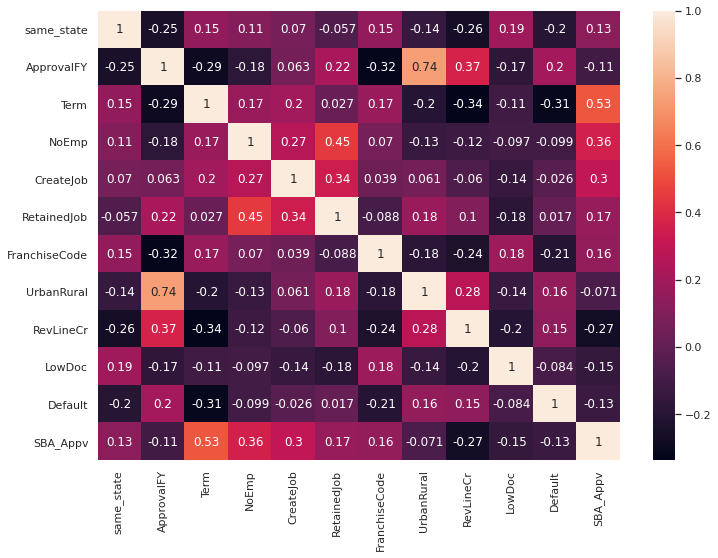

In [ ]:
sns.set(font_scale= 1)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot=True)

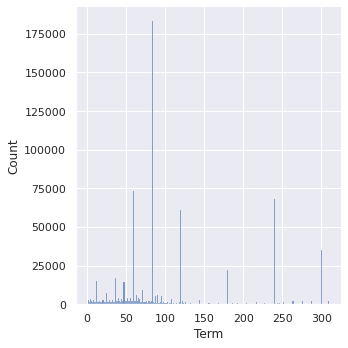

In [ ]:
sns.displot(data=df, x='Term')

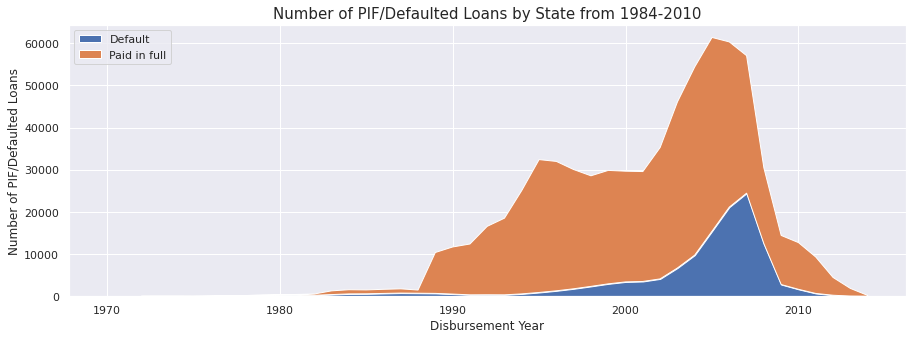

In [ ]:
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['ApprovalFY', 'Default'])['ApprovalFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705782 entries, 0 to 717732
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name_end          705782 non-null  object        
 1   State             705782 non-null  object        
 2   same_state        705782 non-null  bool          
 3   NAICS             705782 non-null  object        
 4   ApprovalDate      705782 non-null  datetime64[ns]
 5   ApprovalFY        705782 non-null  int64         
 6   Term              705782 non-null  int64         
 7   NoEmp             705782 non-null  int64         
 8   CreateJob         705782 non-null  int64         
 9   RetainedJob       705782 non-null  int64         
 10  FranchiseCode     705782 non-null  int64         
 11  UrbanRural        705782 non-null  int64         
 12  RevLineCr         705782 non-null  int64         
 13  LowDoc            705782 non-null  int64         
 14  Disb

In [ ]:
df['DisbursementDate'].sort_values()

191521   1970-02-26
39879    1970-04-14
459830   1970-05-08
131737   1970-06-03
164081   1970-07-02
            ...    
244246   2014-06-23
510575   2014-06-25
199069   2014-06-30
694692   2014-07-30
667798   2014-12-31
Name: DisbursementDate, Length: 705782, dtype: datetime64[ns]

## Recession

In [ ]:
df = create_recession_col(df)

In [ ]:
basic_cat_col_data(df, 'Recession', label=label)

Dtype: bool
Null values: 0
Unique: 2
Vals: 
 False    605704
True     100078
Name: Recession, dtype: int64
Current category: False
False    0.855766
True     0.144234
Name: Default, dtype: float64
Current category: True
False    0.635884
True     0.364116
Name: Default, dtype: float64


## Approval Disbursement difference

In [ ]:
df = create_days_to_disbursement(df)
df.isnull().sum()

/content/gdrive/MyDrive/Colab Notebooks/loan_prediction/loan_prediction/custom_funcs.py:596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_to_disbursement'] = df['days_to_disbursement'].astype('int64')


name_end                0
State                   0
same_state              0
NAICS                   0
ApprovalDate            0
                       ..
DisbursementDate        0
Default                 0
SBA_Appv                0
Recession               0
days_to_disbursement    0
Length: 19, dtype: int64

In [ ]:
df[df['days_to_disbursement'] > 1000][label].value_counts(normalize=True)

False    0.960885
True     0.039115
Name: Default, dtype: float64

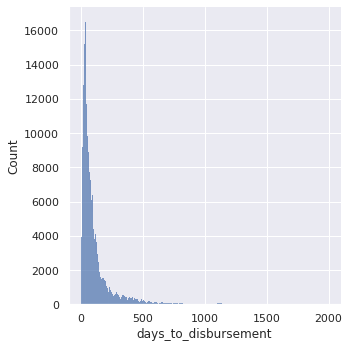

In [ ]:
sns.displot(df['days_to_disbursement'])

In [ ]:
df[df['days_to_disbursement'] > 1000].shape

(5241, 19)

In [ ]:
df[df['days_to_disbursement'] > 500]

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,Default,SBA_Appv,Recession,days_to_disbursement
14,TION,TX,True,0,1993-03-12,1993,60,12,0,0,1,0,0,0,1995-10-31,False,200000,False,963
55,Other,MD,True,54,2003-02-11,2003,12,7,4,7,1,2,1,0,2005-11-30,False,75000,False,1023
102,Other,OH,False,45,2002-09-23,2002,84,4,0,0,1,1,0,1,2004-02-23,False,93500,False,518
112,Other,IL,False,42,2007-02-07,2007,84,1,0,1,1,1,1,0,2009-02-28,False,25000,True,752
152,Other,CA,False,81,2007-06-18,2007,72,1,0,1,0,1,1,0,2009-04-30,True,2500,True,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717495,Other,CA,True,0,1998-03-24,1998,84,2,0,0,1,0,1,0,2000-12-31,False,15000,False,1013
717517,PANY,TN,False,45,1995-04-05,1995,12,7,0,0,1,0,0,0,2000-02-29,False,22500,False,1791
717544,Other,LA,False,81,1993-01-26,1993,60,4,0,0,1,0,0,0,1996-04-30,False,46269,False,1190
717587,Other,MN,False,31,2004-05-18,2004,12,20,0,0,2,2,2,0,2006-04-30,False,7500,False,712


## Dates 

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,Default,SBA_Appv,Recession,days_to_disbursement
0,Other,FL,False,56,2002-11-22,2003,84,1,0,1,1,1,1,0,2003-01-31,False,5000,False,70
1,INC,NY,True,31,2000-07-18,2000,12,9,0,0,1,2,0,0,2000-09-30,False,45000,False,74
2,Other,IA,False,45,2005-09-13,2005,48,1,0,1,1,1,0,0,2005-09-30,True,5000,False,17
3,Other,SD,True,44,1999-06-02,1999,60,9,0,0,1,0,0,1,1999-09-30,False,20800,False,120
5,Other,CA,False,45,2007-07-17,2007,66,3,1,3,0,1,0,0,2007-08-31,True,50000,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,1999-09-27,1999,228,2,4,2,1,1,0,0,2000-04-30,False,375000,False,216
717729,Other,CA,False,42,2005-10-13,2006,57,1,0,1,0,1,2,0,2006-03-31,True,22500,False,169
717730,INC.,NH,True,0,1997-06-10,1997,240,8,8,0,1,0,0,0,1998-03-11,False,291000,False,274
717731,Other,ME,True,81,1996-10-07,1997,120,1,0,0,1,0,0,1,1996-12-31,False,24000,False,85


In [ ]:
df = create_date_data(df)
df = drop_col(df, ['DisbursementDate', 'ApprovalDate', 'ApprovalFY'])


/content/gdrive/MyDrive/Colab Notebooks/loan_prediction/loan_prediction/custom_funcs.py:612: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disbursement_year'] = df['DisbursementDate'].dt.year


## General EDA

In [ ]:
df

,name_end,State,same_state,NAICS,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,Default,SBA_Appv,Recession,days_to_disbursement,disbursement_year
0,Other,FL,False,56,84,1,0,1,1,1,1,0,False,5000,False,70,2003
1,INC,NY,True,31,12,9,0,0,1,2,0,0,False,45000,False,74,2000
2,Other,IA,False,45,48,1,0,1,1,1,0,0,True,5000,False,17,2005
3,Other,SD,True,44,60,9,0,0,1,0,0,1,False,20800,False,120,1999
5,Other,CA,False,45,66,3,1,3,0,1,0,0,True,50000,True,45,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,228,2,4,2,1,1,0,0,False,375000,False,216,2000
717729,Other,CA,False,42,57,1,0,1,0,1,2,0,True,22500,False,169,2006
717730,INC.,NH,True,0,240,8,8,0,1,0,0,0,False,291000,False,274,1998
717731,Other,ME,True,81,120,1,0,0,1,0,0,1,False,24000,False,85,1996


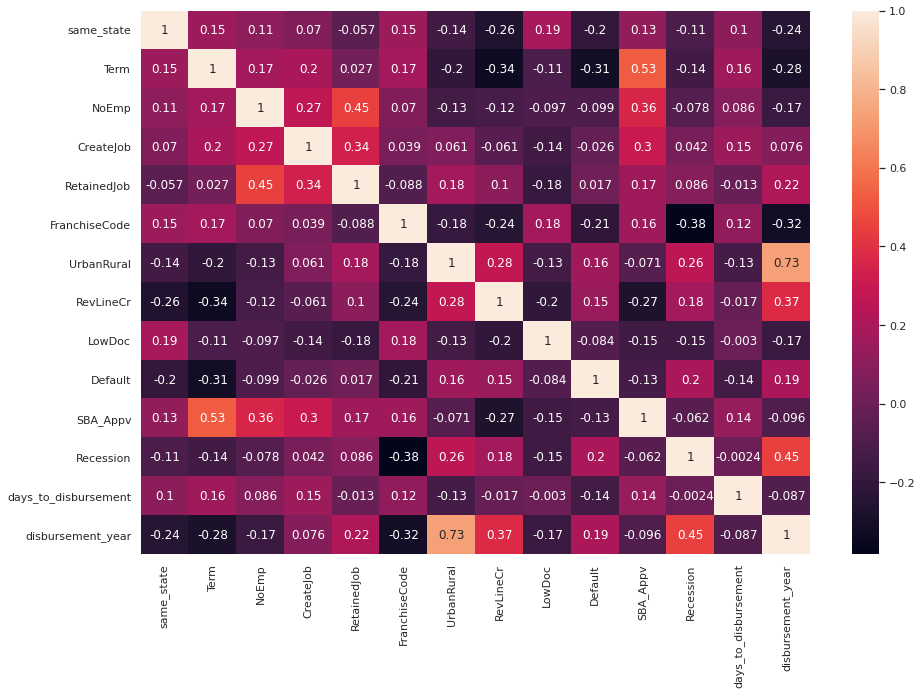

In [ ]:
sns.set(font_scale= 1)
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot=True)


## Outlier treatment

In [ ]:
def print_box_hist(df, cols):

    for col in cols:
        sns.boxplot(df[col])
        plt.show()
        sns.histplot(df[col], kde=True)
        plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


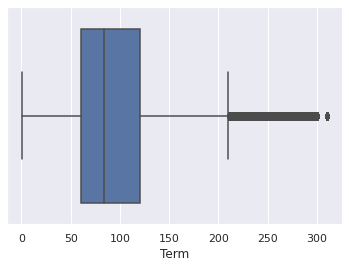

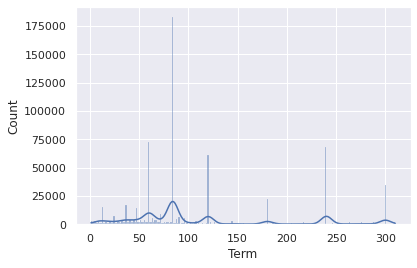

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


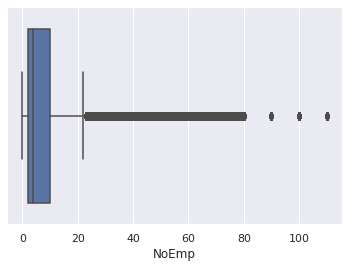

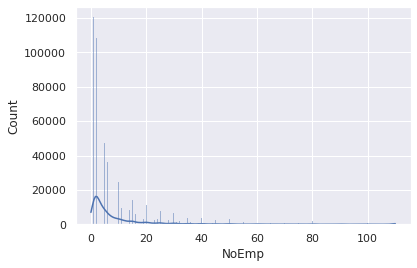

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


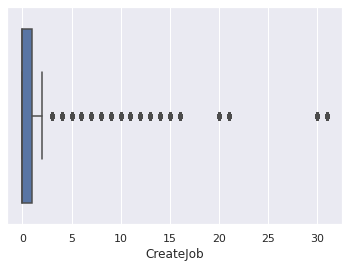

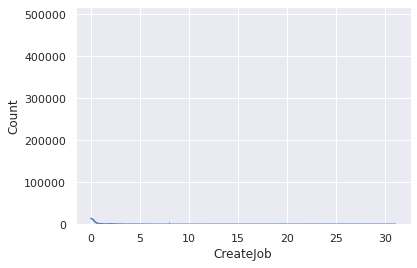

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


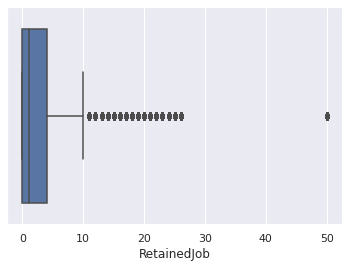

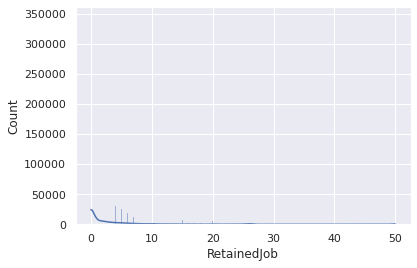

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


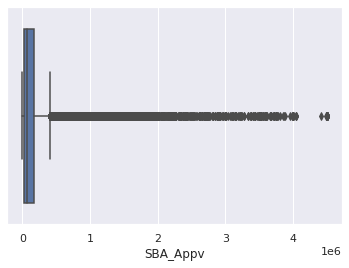

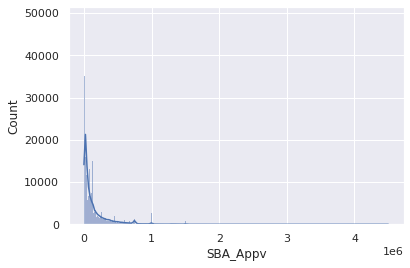

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


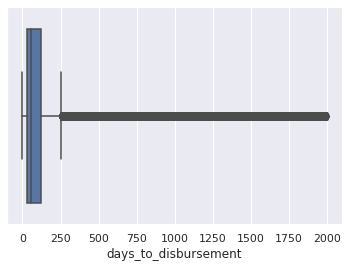

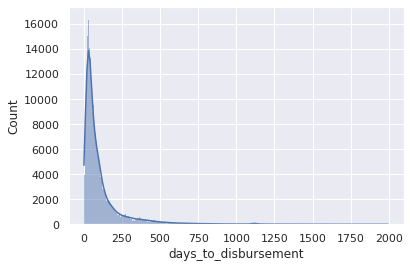

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


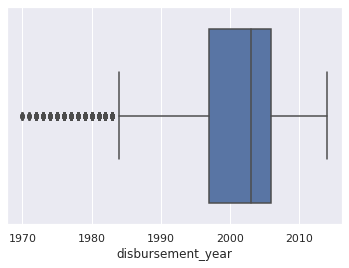

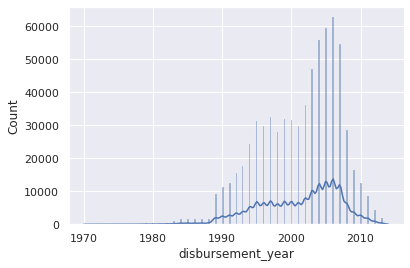

In [ ]:
num_cols = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'SBA_Appv', 
            'days_to_disbursement', 'disbursement_year']
print_box_hist(df, num_cols)

In [ ]:
df.corr().abs().sort_values(by='Default')['Default'][:5]

RetainedJob    0.016707
CreateJob      0.026065
LowDoc         0.083721
NoEmp          0.099408
SBA_Appv       0.132396
Name: Default, dtype: float64

In [ ]:
outlier_cols = ['days_to_disbursement', 'SBA_Appv']

def outlier_treatment(datacolumn, multiplier):
    
    sorted(datacolumn)
    q1, q3 = np.percentile(datacolumn , [25,75])
    iqr = q3 - q1
    lower_range = q1 - (multiplier * iqr)
    upper_range = q3 + (multiplier * iqr)

    return lower_range,upper_range

def remove_outliers(df, outlier_cols_list, multiplier):
    for col in outlier_cols_list:
        lower_range, upper_range = outlier_treatment(df[col], multiplier)
        outliers = df.loc[(df[col] > upper_range) | (df[col] < lower_range)]
        outliers_indexes = outliers.index
        df = df.drop(outliers_indexes)

    return df 

In [ ]:
df.shape

(704555, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


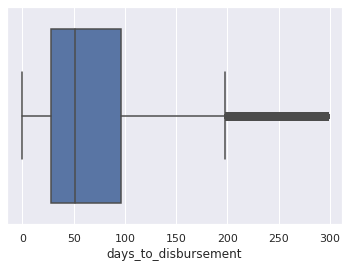

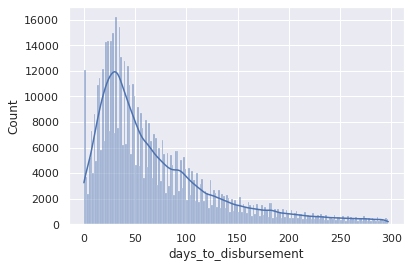

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


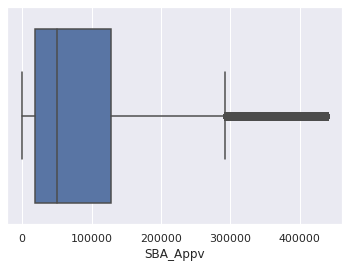

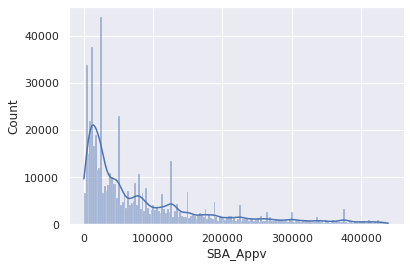

In [ ]:
print_box_hist(remove_outliers(df, outlier_cols, 2), outlier_cols)

In [ ]:
df

,name_end,State,same_state,NAICS,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,Default,SBA_Appv,Recession,days_to_disbursement,disbursement_year
0,Other,FL,False,56,84,1,0,1,1,1,1,0,False,5000,False,70,2003
1,INC,NY,True,31,12,9,0,0,1,2,0,0,False,45000,False,74,2000
2,Other,IA,False,45,48,1,0,1,1,1,0,0,True,5000,False,17,2005
3,Other,SD,True,44,60,9,0,0,1,0,0,1,False,20800,False,120,1999
5,Other,CA,False,45,66,3,1,3,0,1,0,0,True,50000,True,45,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717728,Other,NY,False,54,228,2,4,2,1,1,0,0,False,375000,False,216,2000
717729,Other,CA,False,42,57,1,0,1,0,1,2,0,True,22500,False,169,2006
717730,INC.,NH,True,0,240,8,8,0,1,0,0,0,False,291000,False,274,1998
717731,Other,ME,True,81,120,1,0,0,1,0,0,1,False,24000,False,85,1996


In [ ]:
df.to_csv(prep_train,
          index=False)